In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from aind_hcr_data_loader.tile_data import TileData

# notebook reload
%load_ext autoreload
%autoreload 2

In [4]:
tile_name = 'Tile_X_0006_Y_0002_Z_0000_ch_405.zarr'
bucket_name = 'aind-open-data'
dataset_path = 'HCR_788639-25_2025-06-06_13-00-00_processed_2025-06-17_07-08-14/corrected.ome.zarr/'
pyramid_level = 2

tile = TileData(tile_name=tile_name, 
                bucket_name=bucket_name, 
                dataset_path=dataset_path,
                pyramid_level=pyramid_level,
                verbose=True)



Loaded tile Tile_X_0006_Y_0002_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)


In [5]:
# data is lazy loaded, we don't have tile in memory yet, but we can check its shape
print(tile.shape)
print(tile.z_dim, tile.x_dim, tile.y_dim)

(341, 477, 477)
341 477 477


In [72]:
# see dask array before loading
tile.dask_array

dask.array<getitem, shape=(1365, 1910, 1910), dtype=uint16, chunksize=(128, 256, 256), chunktype=numpy.ndarray>

# Optional: load all tile data into memory
(not necessary for most class functions, better to leave lazy loaded)

In [73]:
tile.data

array([[[ 95,  92,  96, ...,  87,  96,  88],
        [ 95,  89,  95, ...,  82,  89,  96],
        [ 90,  92,  91, ...,  94,  91,  89],
        ...,
        [100,  90,  93, ...,  82,  87,  91],
        [ 91,  92,  89, ...,  90,  91,  90],
        [ 93,  94,  89, ..., 100, 101,  95]],

       [[ 90,  92,  87, ...,  96,  90,  91],
        [ 92,  89,  93, ...,  84,  93,  60],
        [ 92,  87,  91, ...,  92,  91,  93],
        ...,
        [ 98,  91,  90, ...,  86,  89,  93],
        [ 87,  92,  84, ...,  90,  91,  88],
        [ 95,  90,  88, ...,  95,  93,  99]],

       [[ 95,  95,  92, ...,  98,  94,  90],
        [ 88,  91,  93, ...,  82, 100, 100],
        [ 87,  90,  86, ...,  90,  91,  91],
        ...,
        [ 75,  91,  93, ...,  84,  89,  91],
        [ 91,  92,  86, ...,  90,  91,  88],
        [ 89,  94,  89, ...,  93, 103,  97]],

       ...,

       [[ 92,  88,  94, ..., 102,  94,  88],
        [ 97,  91,  91, ...,  89,  89,  94],
        [ 88,  96,  89, ...,  92,  89,  89

# Grab slices

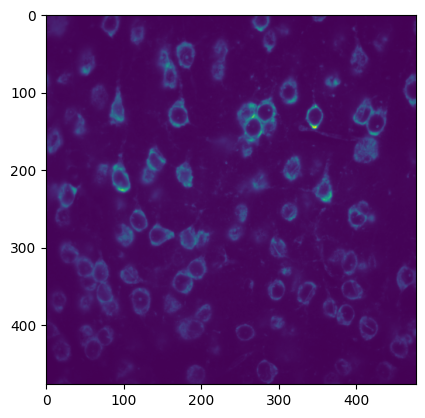

In [ ]:
plt.imshow(tile.get_slice(200, orientation='xy'))
plt.show()

Loaded tile Tile_X_0006_Y_0002_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)


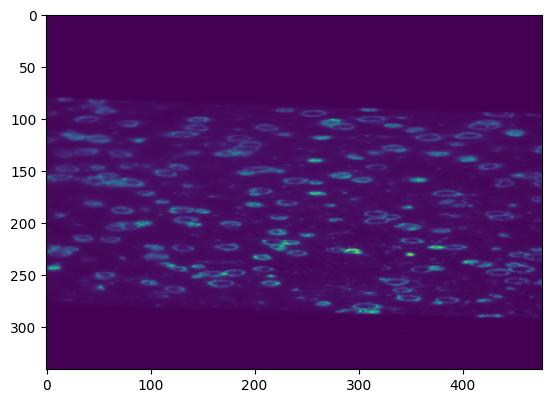

In [6]:
plt.imshow(tile.get_slice(200,orientation='zx'))
plt.show()

## Project across slices

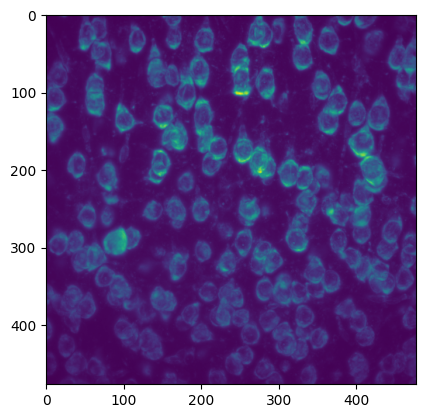

In [ ]:
# options: 'mean', 'max', 'min', 'sum',
plt.imshow(tile.project(axis='z', method='max', start=100, end=110))
plt.show()

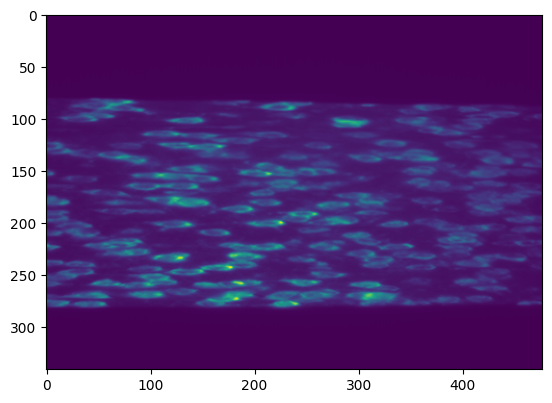

In [53]:
# options: 'mean', 'max', 'min', 'sum',
plt.imshow(tile.project(axis='x', method='mean', start=90, end=120))
plt.show()

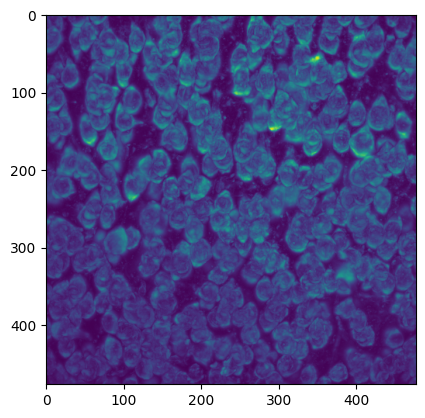

In [60]:
plt.imshow(tile.project(axis='z', method='max', start=90, end=120)/tile.project(axis='z', method='mean', start=90, end=120))

## Set different pyramid level

In [75]:
tile_data = tile.set_pyramid_level(0).connect()
print(tile_data.shape)

(1365, 1910, 1910)


## Calculate slices with most data

In [74]:
# use level 2 pyramid data, and show the max slice in each orientation, upscaling to all pyramid levels
tile.calculate_max_slice(level_to_use=2)

level_to_use: 2, level: 3
level_to_use: 2, level: 4
level_to_use: 2, level: 5


{0: {'z': 580, 'y': 924, 'x': 1080},
 1: {'z': 290, 'y': 462, 'x': 540},
 2: {'z': 145, 'y': 231, 'x': 270},
 3: {'z': 72, 'y': 115, 'x': 135},
 4: {'z': 36, 'y': 57, 'x': 67},
 5: {'z': 18, 'y': 28, 'x': 33}}